In [1]:
# Import de librerias

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy
from scipy.stats import pearsonr
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [6]:
# Carga de datos
data = pd.read_csv('StudentPerformanceFactors.csv')

In [7]:
# Analisis de missing values 
print("\nMissing values:")
missing_values = data.isnull().sum()


Missing values:


In [8]:
missing_percentage = (missing_values / len(data)) * 100

In [9]:
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

In [10]:
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

In [11]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [12]:
# ya que los porcentajes de MV son muy bajos para cada variable, busco la moda de cada variable para reemplazarlo
teacher_quality_mode = data['Teacher_Quality'].mode()[0]
parental_education_mode = data['Parental_Education_Level'].mode()[0]
distance_from_home_mode = data['Distance_from_Home'].mode()[0]

print("Teacher Quality - Moda: ", teacher_quality_mode)
print("Parental Education Level - Moda: ", parental_education_mode)
print("Distance from Home - Moda: ", distance_from_home_mode)

Teacher Quality - Moda:  Medium
Parental Education Level - Moda:  High School
Distance from Home - Moda:  Near


In [13]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [14]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [15]:
# reemplazo missing values por el valor de la moda para cada caso
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(teacher_quality_mode)
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(parental_education_mode)
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(distance_from_home_mode)

# verifico si quedan missing values luego de imputarlos
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [16]:
# Recodificar Exam_Score en una variable binaria
data['Exam_Score_Binary'] = np.where(data['Exam_Score'] > 70, 1, 0)

# Comprobar la distribución de la nueva variable
print(data['Exam_Score_Binary'].value_counts(normalize=True))

Exam_Score_Binary
0    0.836083
1    0.163917
Name: proportion, dtype: float64


In [17]:
# Variables explicativas
X = data[['Attendance', 'Hours_Studied', 'Previous_Scores']]

# Agregar constante
X = sm.add_constant(X)

# Variable dependiente
y = data['Exam_Score_Binary']

# Ajustar el modelo logístico
logit_model = sm.Logit(y, X).fit()

# Resumen del modelo
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.241381
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      Exam_Score_Binary   No. Observations:                 6607
Model:                          Logit   Df Residuals:                     6603
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.4589
Time:                        15:05:10   Log-Likelihood:                -1594.8
converged:                       True   LL-Null:                       -2947.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -27.5425      0.823    -33.478      0.000     -29.155     -25.930
Attendance    

Optimization terminated successfully.
         Current function value: 0.243504
         Iterations 8
Matriz de Confusión:
 [[1598   51]
 [ 140  194]]
Precisión: 0.90
ROC-AUC: 0.93


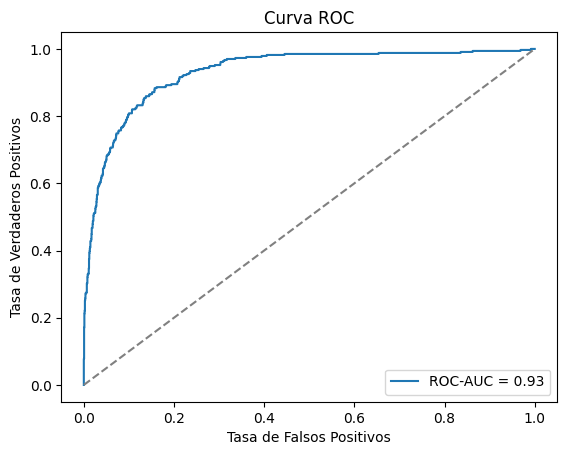

In [18]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo logístico con el conjunto de entrenamiento
logit_model_train = sm.Logit(y_train, X_train).fit()

# Predicciones en el conjunto de prueba
y_pred = logit_model_train.predict(X_test)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Matriz de Confusión:\n", conf_matrix)

# Métricas de desempeño
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()